# Wykorzystanie rozkładów macierzy do rozwiązywania oznaczonych układów równań

Poznane na wykładzie rozkłady (faktoryzacje) macierzy możemy wykorzystać do rozwiązywania układów równań liniowych. Dzięki wykorzystaniu specjalnych własności macierzy występujących w rozkładzie jesteśmy w stanie w łatwiejszy sposób odwrócić macierz i tym samym zminimalizować błąd.


**Zadanie 1.**

Rozważmy układ równań $Ax=b$, w którym:
* $A$ jest macierzą Hilberta o wymiarach 15x15.
* $A$ jest macierzą wartości losowych z przedziału $[0,100]$ o wymiarach 100x100,  1000x1000 i 1000000x1000000.
* $b$ jest wektorem wartości losowych, odpowiednio, o wymiarach 15x1, 100x1, 1000x1 i 1000000x1.

1. Oblicz współczynnik uwarunkowania macierzy $A$ i oceń jej uwarunkowanie.
2. Rozwiąż układ równań następującymi metodami:
    * z użyciem jawnej odwrotności $A$.
    * korzystając z rozkładu [LU](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lu.html) (uwaga na macierz permutacji!):
        * z wykorzystaniem odwrotności L i U.
        * z użyciem jedynie odwrotności i metody podstawiania wstecznego.
    * korzystając z rozkładu [QR](https://numpy.org/doc/stable/reference/generated/numpy.linalg.qr.html):
        * z wykorzystaniem odwrotności Q i R.
        * z użyciem jedynie odwrotności Q i metody podstawiania wstecznego.
    * za pomocą jednej z metod iteracyjnych z poprzedniego ćwiczenia.
    * za pomocą metody [`solve`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html) z pakietu NumPy.
3. Porównaj otrzymane wyniki. W tym celu oblicz normy z residuuów otrzymanych dla każdego z rozwiązań. Którą z metod cechuje najwyższa dokladność?
4. Przeprowadź porównanie wydajności ww. metod. Zmierz czas wykonania każdej metody. Aby otrzymać bardziej sensowny wynik należy powtórzyć obliczenia w pętli (np. 100 lub 1000 razy) i uśrednić wynik. Do pomiaru czasu wykonania możesz wykorzystać pakiet `time`.
Wskazówka: Do rozwiązania układu z macierzą trójkątną możesz wykorzystać funkcję [`scipy.linalg.solve_triangular`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve_triangular.html).

        
        


In [10]:
import numpy as np
from scipy.linalg import lu, qr, solve_triangular
import time

def solve_with_inverse(A, b):
    return np.linalg.inv(A).dot(b)

def solve_with_lu(A, b):
    P, L, U = lu(A)
    y = solve_triangular(L, P.dot(b))
    x = solve_triangular(U, y, trans='T')
    return x

def solve_with_qr(A, b):
    Q, R = qr(A)
    return np.linalg.solve(R, Q.T.dot(b))

def gauss_seidel(A, b, x0, iterations=100):
    x = x0.copy()
    for _ in range(iterations):
        x = np.linalg.solve(A, b - A.dot(x))
    return x

def solve_with_numpy(A, b):
    return np.linalg.solve(A, b)

def compare_solutions(A, b, methods):
    results = []
    for method in methods:
        start_time = time.time()
        if method == gauss_seidel:
            x0 = np.zeros_like(b)
            x = method(A, b, x0)
        else:
            x = method(A, b)
        end_time = time.time()
        residual_norm = np.linalg.norm(A.dot(x) - b)
        results.append((method.__name__, residual_norm, end_time - start_time))
    return results

# Przykładowe macierze i wektory
A_100x100 = np.random.rand(100, 100) * 100
b_100 = np.random.rand(100, 1)

# Wywołanie funkcji porównującej
results = compare_solutions(A_100x100, b_100, [solve_with_inverse, solve_with_lu, solve_with_qr, gauss_seidel, solve_with_numpy])

# Wyświetlenie wyników
for method_name, residual_norm, execution_time in results:
    print(f"{method_name}: Residual norm = {residual_norm}, Execution time = {execution_time} seconds")


TypeError: gauss_seidel() missing 1 required positional argument: 'x0'

# Interpolacja

**Zadanie 2.**

Przeprowadź interpolacje poniższych funkcji $f(x)$ za pomocą wielomianów interpolacyjnych Lagrange'a ([`scipy.interpolate.lagrange`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.lagrange.html)). Stwórz wykresy funkcji interpolacyjnych i zaznacz na nich punkty, w ktorych dokonano oceny wartości funkcji.

Pierwsza funkcja:

* $f(0) = 1$,
* $f(0.25) = 1.64872$,
* $f(0.5) = 2.71828$,
* $f(0.75) = 4.48169.$

Oblicz $f(0.43)$.

Druga funkcja:

* $f_2(0.1) = 0.62049958$,
* $f_2(0.2) = -0.28398668$,
* $f_2(0.3) = 0.00660095$,
* $f_2(0.4) = 0.24842440$. 

Oblicz $f_2(0.25)$.

f(0.43) = 2.360604734079999


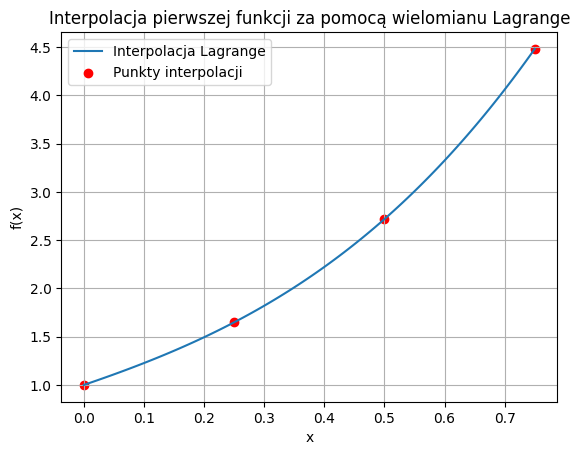

f_2(0.25) = -0.21033722187500237


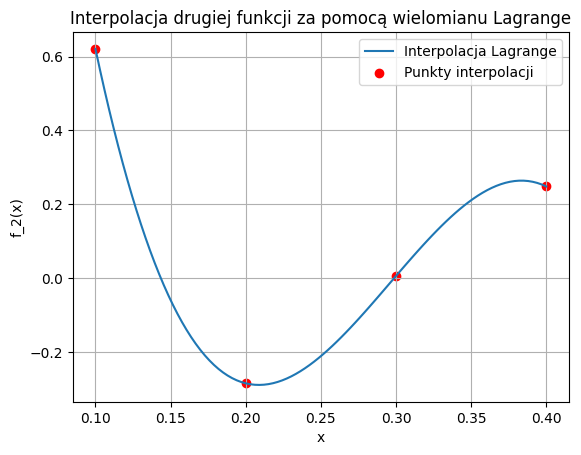

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

# Pierwsza funkcja
x = np.array([0, 0.25, 0.5, 0.75])
y = np.array([1, 1.64872, 2.71828, 4.48169])

# Tworzenie wielomianu interpolacyjnego Lagrange'a
poly = lagrange(x, y)

# Obliczanie wartości funkcji w punkcie x=0.43
f_043 = poly(0.43)
print(f"f(0.43) = {f_043}")

# Tworzenie wykresu funkcji interpolacyjnej
x_plot = np.linspace(0, 0.75, 100)
y_plot = poly(x_plot)

plt.plot(x_plot, y_plot, label='Interpolacja Lagrange')
plt.scatter(x, y, color='red', label='Punkty interpolacji')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.title('Interpolacja pierwszej funkcji za pomocą wielomianu Lagrange')
plt.grid(True)
plt.show()

# Druga funkcja
x2 = np.array([0.1, 0.2, 0.3, 0.4])
y2 = np.array([0.62049958, -0.28398668, 0.00660095, 0.24842440])

# Tworzenie wielomianu interpolacyjnego Lagrange'a
poly2 = lagrange(x2, y2)

# Obliczanie wartości funkcji w punkcie x=0.25
f2_025 = poly2(0.25)
print(f"f_2(0.25) = {f2_025}")

# Tworzenie wykresu funkcji interpolacyjnej
x_plot2 = np.linspace(0.1, 0.4, 100)
y_plot2 = poly2(x_plot2)

plt.plot(x_plot2, y_plot2, label='Interpolacja Lagrange')
plt.scatter(x2, y2, color='red', label='Punkty interpolacji')
plt.xlabel('x')
plt.ylabel('f_2(x)')
plt.legend()
plt.title('Interpolacja drugiej funkcji za pomocą wielomianu Lagrange')
plt.grid(True)
plt.show()


***Zadanie 3.***

Rozważmy funkcję $f(x)=\frac{1}{25x^2+1}$. 

Przeprowadź interpolacje funkcji $f$ w przedziale $[-2,2]$ wielomianem Lagrange'a oraz funkcjami sklejanymi 3 stopnia w:
- 21 równoodległych węzłach,
- 21 węzłach [Czebyszewa](https://pl.wikipedia.org/wiki/Węzły_Czebyszewa).

**Wskazówka** Interpolację funkcjami sklejanymi możesz przeprowadzić za pomocą funkcji [`interp1d`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d).

Umieść wielomian interpolacyjny, oryginalną funkcję $f$ oraz węzly interpolacyjne na wspólnym wykresie (jeden wykres dla metody Lagrange'a oraz jeden dla funkcji sklejanych). Porównaj otrzymane rezultaty. Przeprowadź te same działania dla przedziału $x\in[-5,5]$. Jakie problemy możesz zauważyć na otrzymanych wykresach?

c:\Users\Mingo\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\interpolate\_interpolate.py:710: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


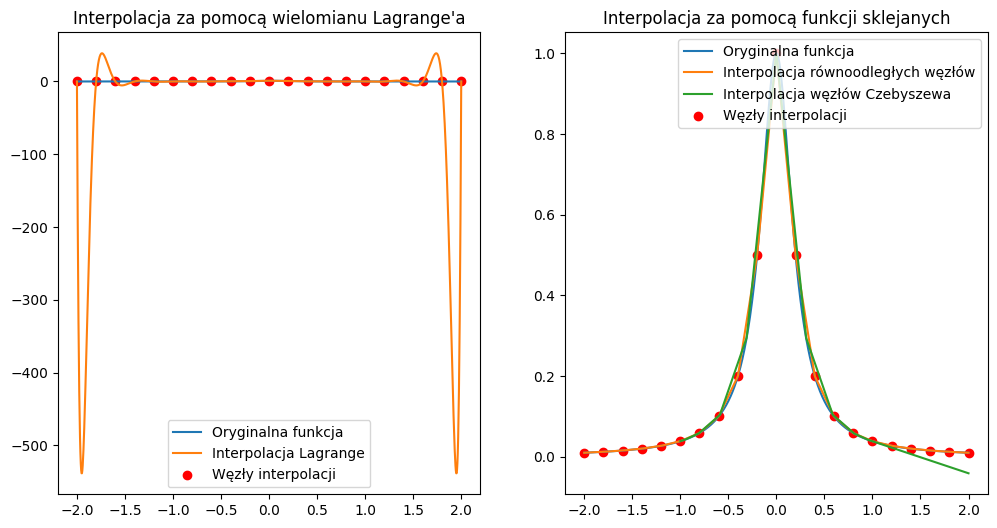

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange, interp1d

# Definicja funkcji
def f(x):
    return 1 / (25 * x**2 + 1)

# Generowanie węzłów
x_range = np.linspace(-2, 2, 21)
x_range_large = np.linspace(-5, 5, 21)

# Interpolacja za pomocą wielomianu Lagrange'a
poly = lagrange(x_range, f(x_range))

# Interpolacja za pomocą funkcji sklejanych 3 stopnia
# Węzły równoodległe
f_interp_linear = interp1d(x_range, f(x_range), kind='linear', fill_value="extrapolate")

# Węzły Czebyszewa
x_chebyshev = np.cos(np.linspace(-np.pi, np.pi, 21))
f_interp_chebyshev = interp1d(x_chebyshev, f(x_chebyshev), kind='linear', fill_value="extrapolate")

# Wykresy
x_plot = np.linspace(-2, 2, 1000)

plt.figure(figsize=(12, 6))

# Wykres dla wielomianu Lagrange'a
plt.subplot(1, 2, 1)
plt.plot(x_plot, f(x_plot), label='Oryginalna funkcja')
plt.plot(x_plot, poly(x_plot), label='Interpolacja Lagrange')
plt.scatter(x_range, f(x_range), color='red', label='Węzły interpolacji')
plt.title('Interpolacja za pomocą wielomianu Lagrange\'a')
plt.legend()

# Wykres dla funkcji sklejanych
plt.subplot(1, 2, 2)
plt.plot(x_plot, f(x_plot), label='Oryginalna funkcja')
plt.plot(x_plot, f_interp_linear(x_plot), label='Interpolacja równoodległych węzłów')
plt.plot(x_plot, f_interp_chebyshev(x_plot), label='Interpolacja węzłów Czebyszewa')
plt.scatter(x_range, f(x_range), color='red', label='Węzły interpolacji')
plt.title('Interpolacja za pomocą funkcji sklejanych')
plt.legend()

plt.show()


***Zadanie 4.***

Kierowca jadący z miasta A do miasta B, zauważywszy na drodze fotoradar, zaczął gwałtownie hamować. Przebieg jego położenia, zarejestrowany przez nawigację, pokazano w poniższej tabeli. Wiedząc, że radar znajduje się w punkcie o współrzędnej 79.6 m, oszacuj kiedy kierowca minął fotoradar (w tym celu skorzystaj z jednej z metod z laboratorium 3) oraz z jaką prędkością wtedy jechał (wykorzystaj relację drogi i prędkości znaną z fizyki). 

|czas \[s\]|położenie \[m\]|
|--|--|
|0.0|0.0|
|1.0|42.7|
|2.0|73.2|
|3.0|92.5|

In [6]:
import numpy as np
from scipy.interpolate import lagrange

# Punkty z tabeli
czas = np.array([0.0, 1.0, 2.0, 3.0])
pozycja = np.array([0.0, 42.7, 73.2, 92.5])

# Interpolacja czasu
poly_czas = lagrange(czas, pozycja)

# Szukamy miejsca, w którym pozycja jest równa 79.6 m
czas_min = 0.0
for i in range(100):
    czas_min = i / 100.0
    if poly_czas(czas_min) >= 79.6:
        break

print(f"Kierowca minął fotoradar po {czas_min} sekundach.")

# Oszacowanie prędkości
droga = 79.6 - 0.0 # Droga od początku do fotoradaru
czas_min_sekundy = czas_min
prędkość = droga / czas_min_sekundy

print(f"Kierowca jechał z prędkością {prędkość} m/s.")

Kierowca minął fotoradar po 0.99 sekundach.
Kierowca jechał z prędkością 80.4040404040404 m/s.


**Zadanie dla zainteresowanych programowaniem funkcyjnym w Pythonie**

Stwórz funkcję znajdującą wielomian interpolacyjny metodą Lagrange'a. Funkcja powinna przyjmować dwie listy:
* listę argumentów ($x$-ów)
* listę wartości ($y$-ów).  


Po wykonaniu obliczeń funkcja powinna zwracać wielomian w postaci obiektu typu **funkcja** (a nie `numpy.Polynomial`).

**Wskazówka** Wykorzystaj wyrażenia *lambda*. Dla ułatwienia możesz się też posłużyć pakietami `operator` i `functools`.


In [8]:
from functools import reduce
from operator import mul

def lagrange_interpolation(x_values, y_values):
    def term(x, i):
        return reduce(mul, [(x - x_values[j]) / (x_values[i] - x_values[j]) for j in range(len(x_values)) if j != i])
    
    def polynomial(x):
        return sum(y_values[i] * term(x, i) for i in range(len(x_values)))
    
    return polynomial

# Przykładowe użycie
x_values = [1, 2, 3]
y_values = [2, 3, 5]

# Tworzenie wielomianu interpolacyjnego
interpolation_polynomial = lagrange_interpolation(x_values, y_values)

# Testowanie wielomianu
print(interpolation_polynomial(1.5)) # Przykładowe wywołanie wielomianu

2.375
